# Predicting Customer Purchases Using Decision Tree Classifier

#### The primary goal of this analysis is to predict whether a customer will subscribe to a term deposit (the target variable) based on their demographic and behavioral data using a decision tree classifier. The dataset used for this analysis is the Bank Marketing dataset from the UCI Machine Learning Repository.

In [9]:
import pandas as pd
file_path = "C:/Users/rocky/Downloads/bank-additional/bank-additional/bank-additional-full.csv"
bank_data = pd.read_csv(file_path, sep=';')
print(bank_data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# Data Cleaning

In [10]:
print(bank_data.head())
print(bank_data.shape)
print(bank_data.isnull().sum())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

### Numerical Features

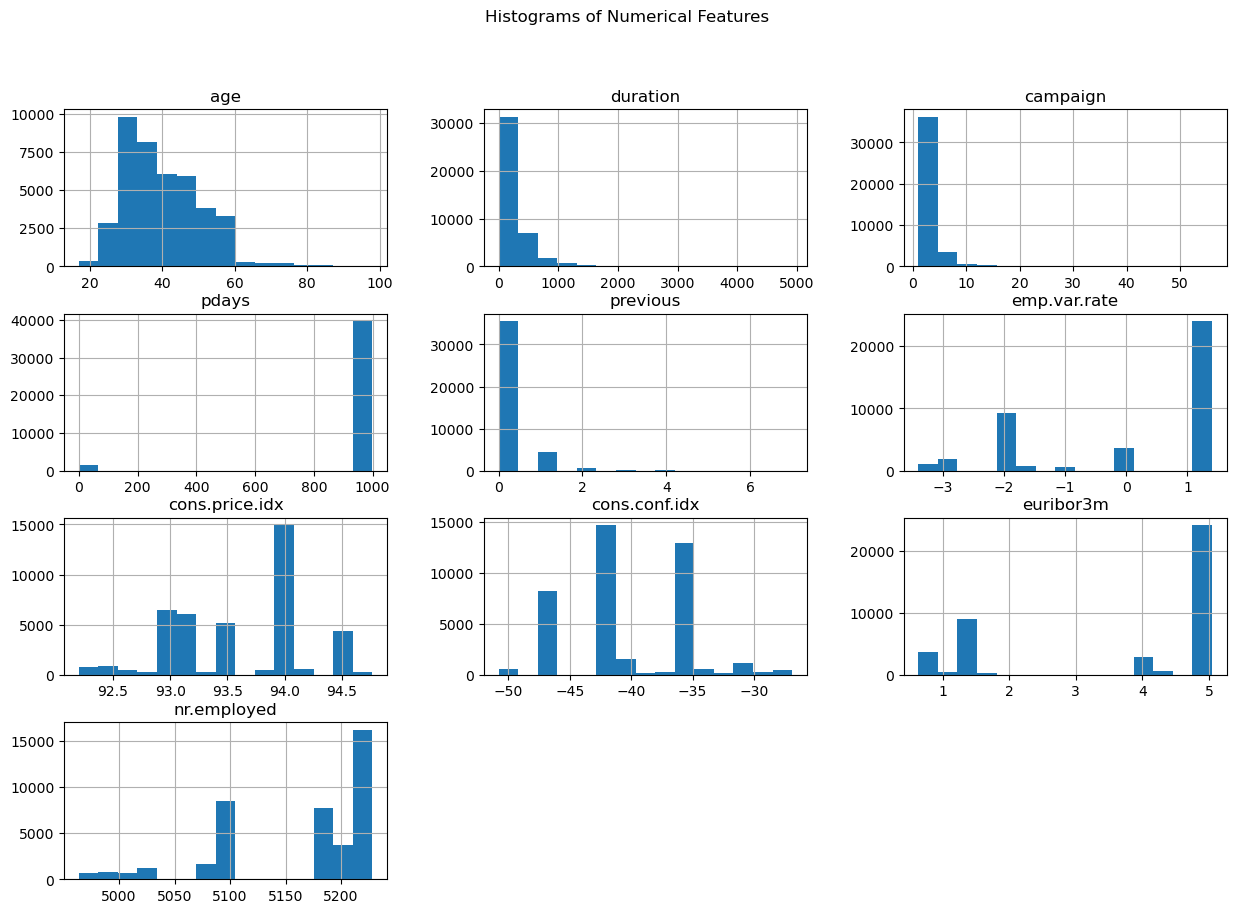

In [17]:
numerical_features = bank_data.select_dtypes(include=['int64', 'float64']).columns
bank_data[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

### Count points

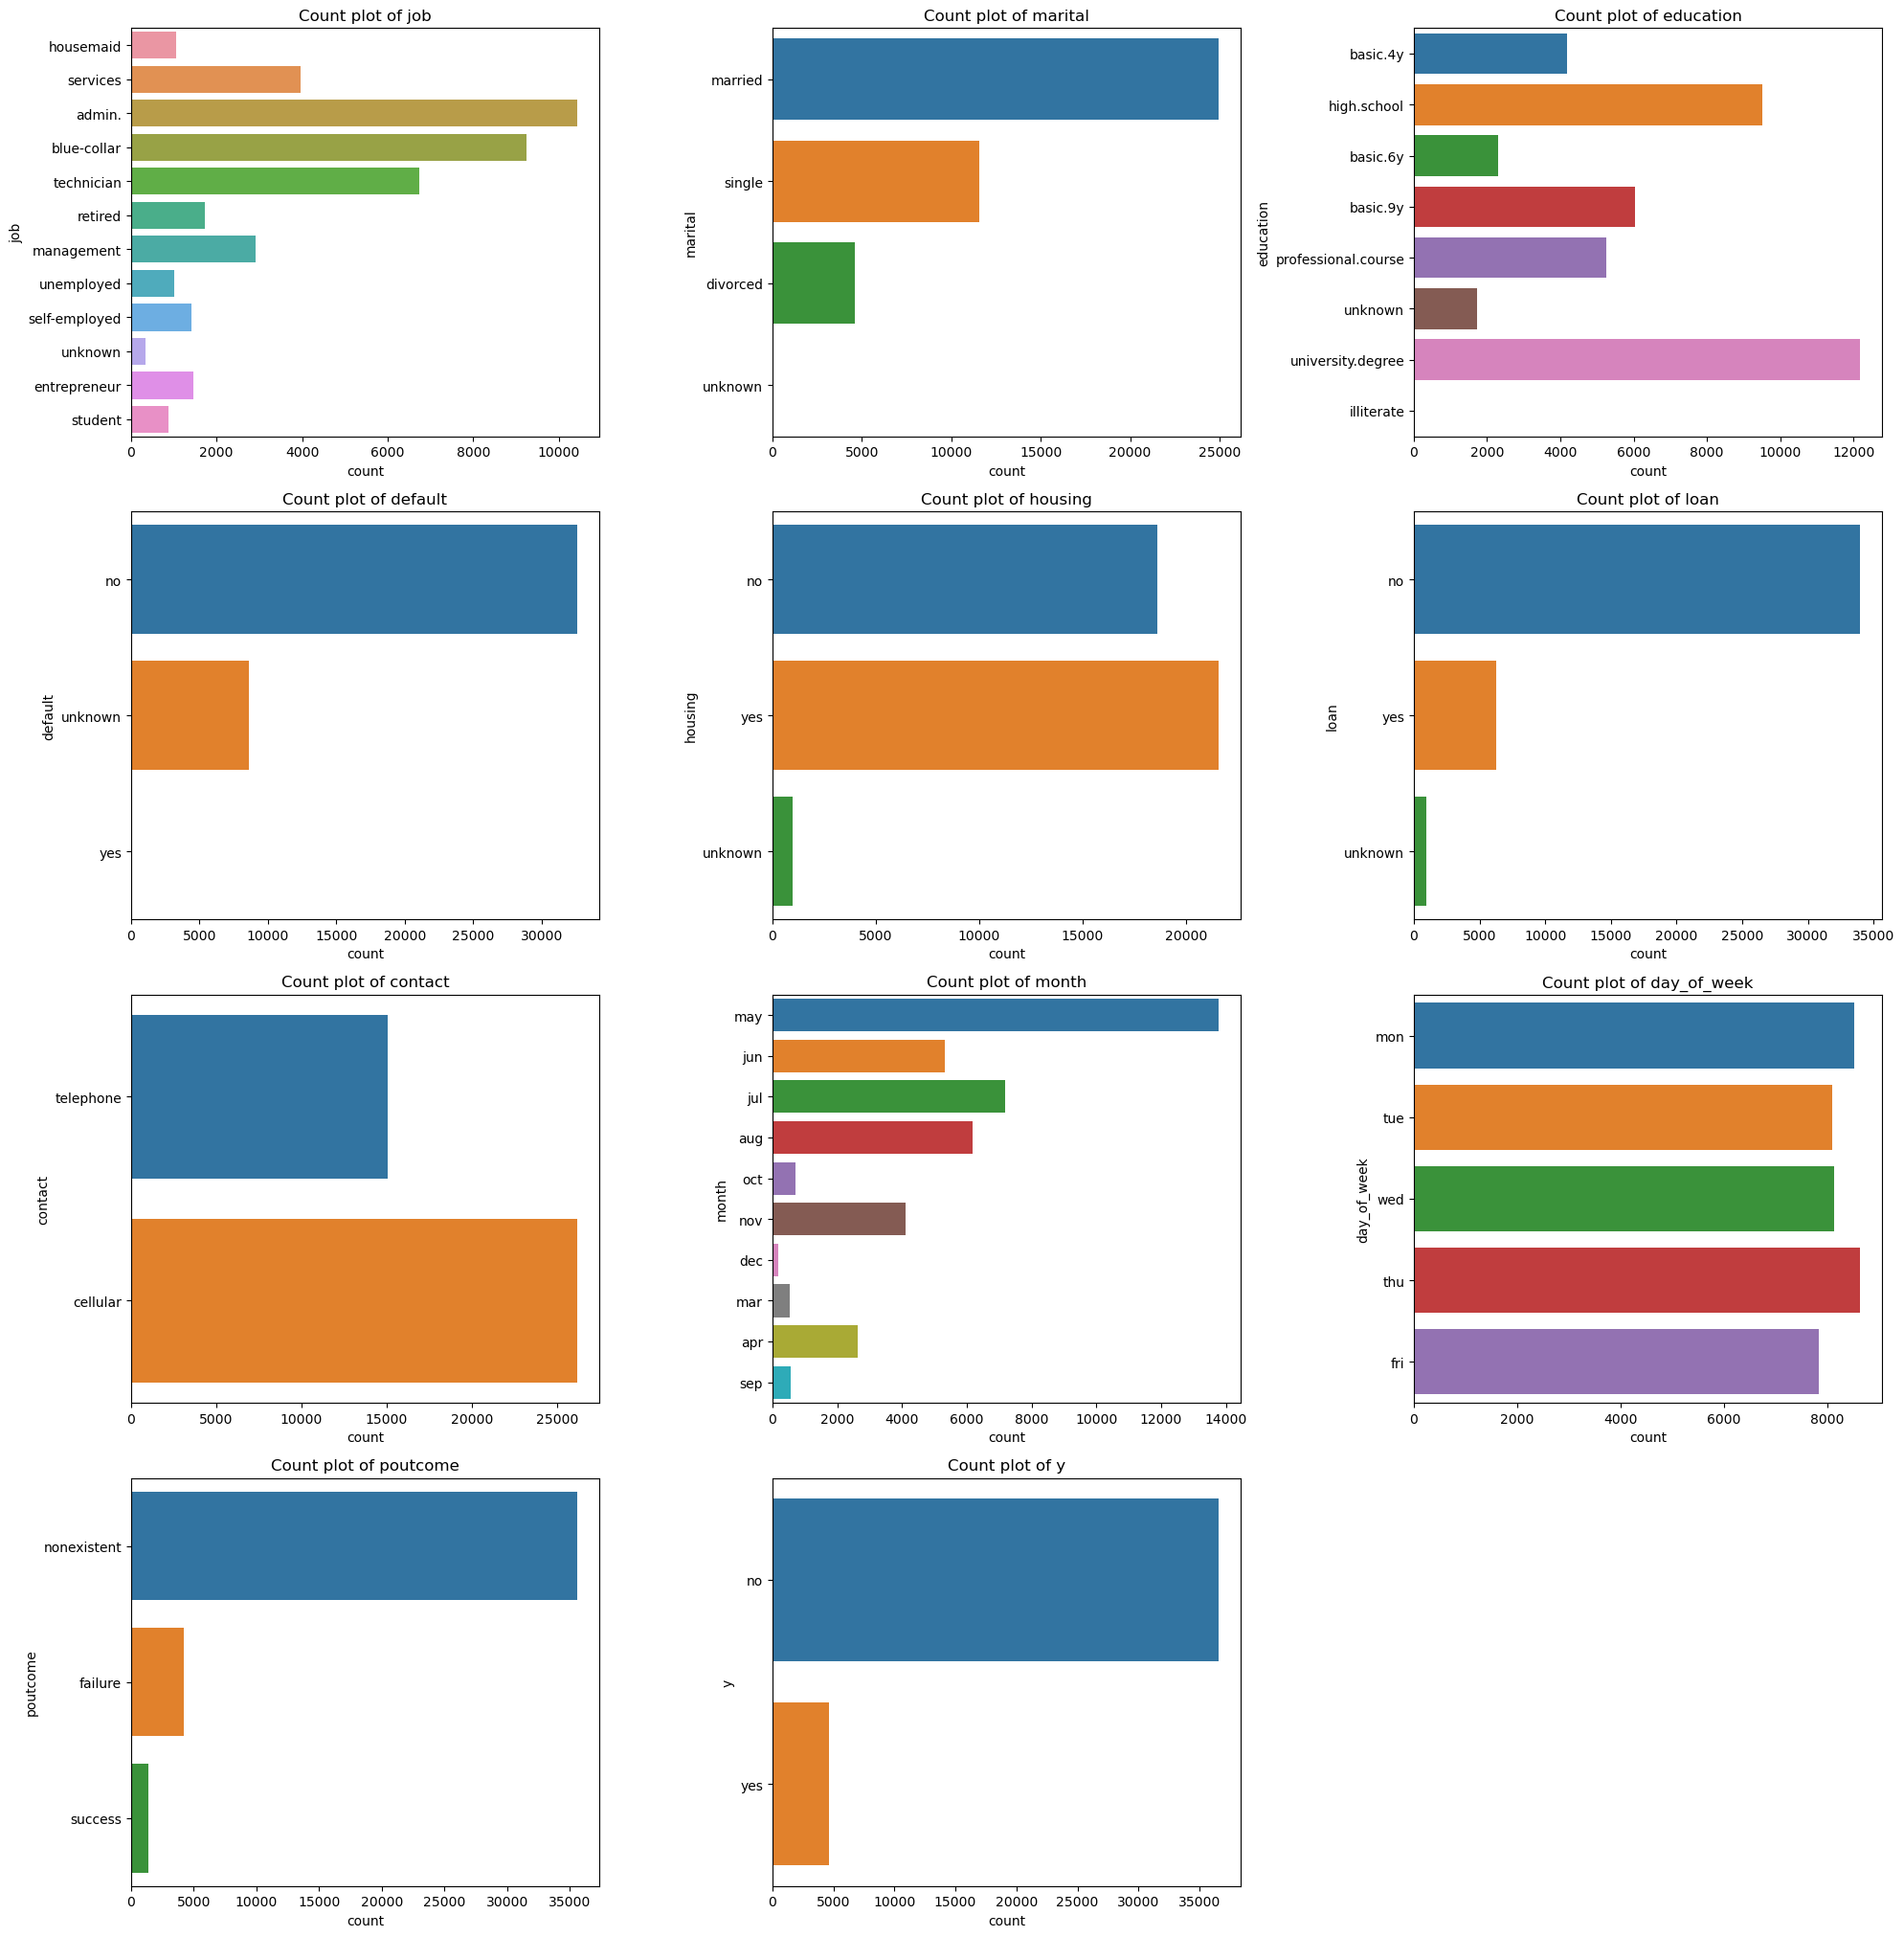

In [19]:
import seaborn as sns
categorical_features = bank_data.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 30))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(y=column, data=bank_data)
    plt.title(f'Count plot of {column}')
plt.tight_layout()
plt.show()

In [11]:
bank_data_encoded = pd.get_dummies(bank_data)
bank_data_encoded.fillna(bank_data_encoded.mean(), inplace=True)

In [12]:
X = bank_data_encoded.drop('y_yes', axis=1)  # Features
y = bank_data_encoded['y_yes']  # Target variable

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Visuals

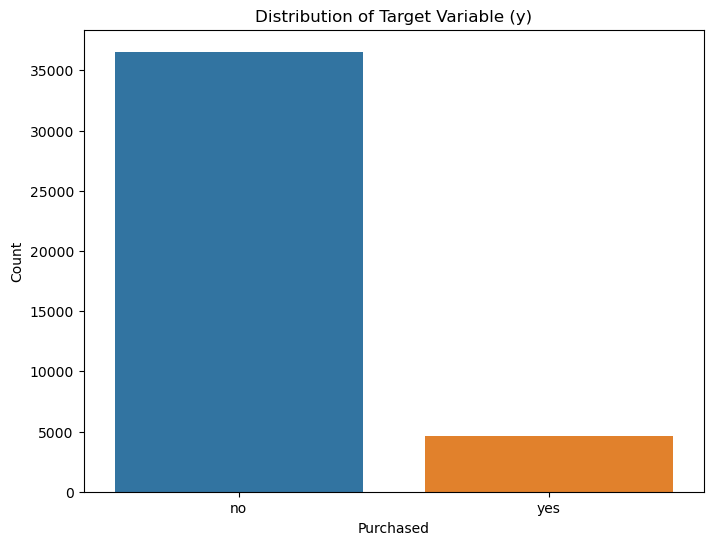

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=bank_data)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7303
        True       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238



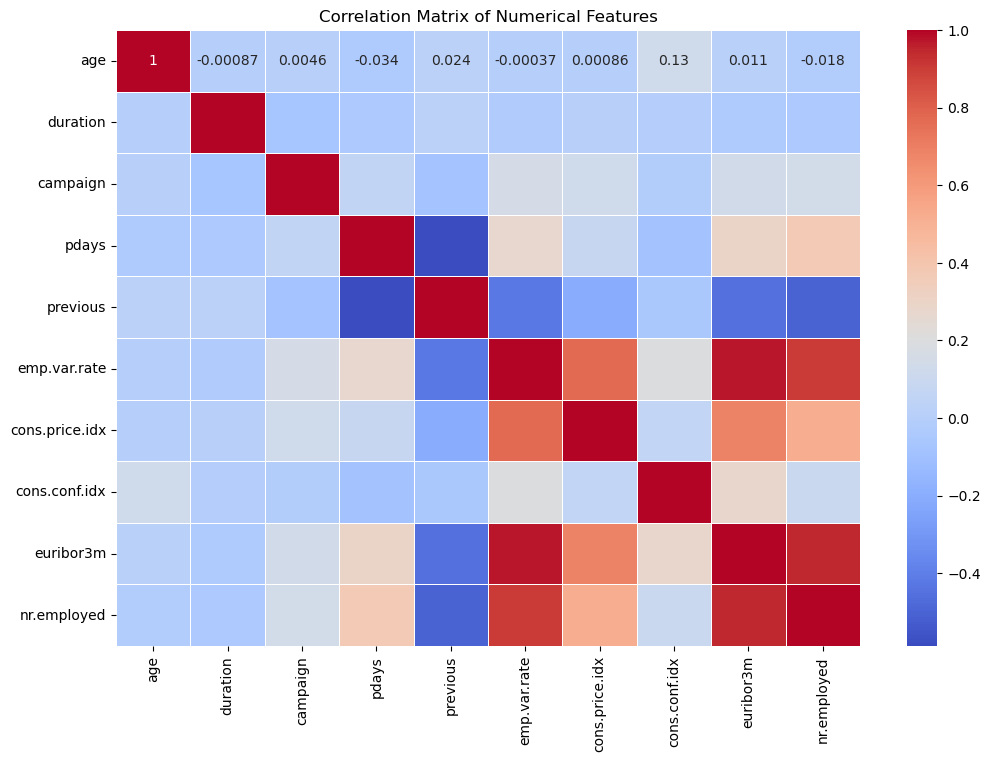

In [21]:
plt.figure(figsize=(12, 8))
corr_matrix = bank_data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

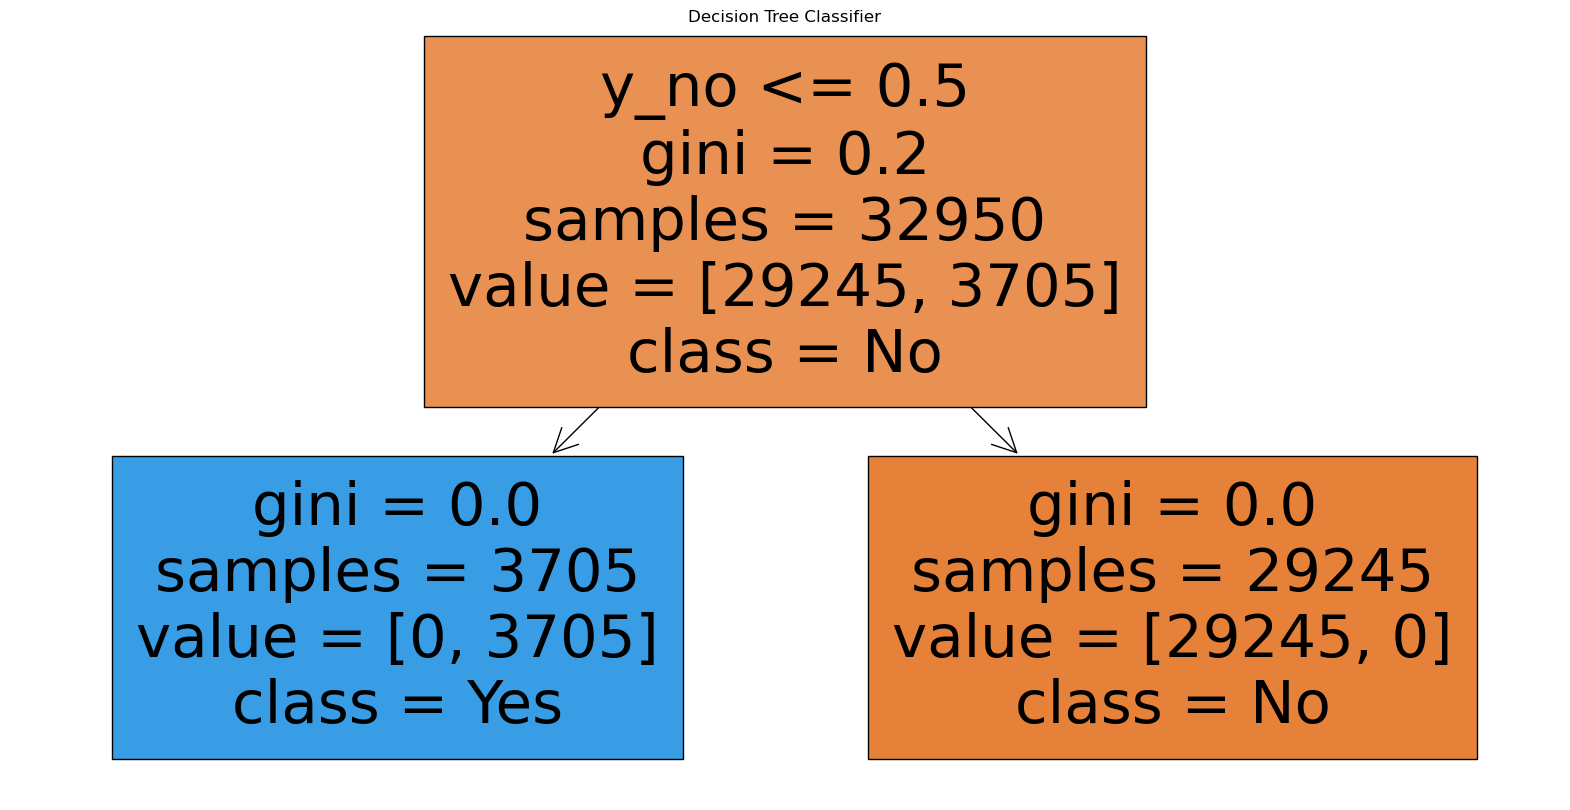

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title('Decision Tree Classifier')
plt.show()